In [1]:
from sklearn.linear_model import LinearRegression
from itertools import product
import pandas as pd
import numpy as np
import matplotlib.style
import matplotlib.pyplot as plt
import yfinance as yf

pd.options.display.float_format = '{:.6f}'.format
plt.style.use("seaborn-v0_8")
from itertools import product

In [3]:
symbol = "EURUSD=X"
start = "2019-01-01"
end = "2020-01-01"
interval = '1d'
lags=2

In [4]:
df = yf.download(symbol, start, end, interval=interval).Close.to_frame()
df.rename(columns={"Close": "price"}, inplace=True)
df['returns'] = np.log(df['price'].div(df['price'].shift(1)))
df

[*********************100%%**********************]  1 of 1 completed


,price,returns
Date,,
2019-01-01,1.149306,NaN
2019-01-02,1.146171,-0.002732
2019-01-03,1.131811,-0.012608
2019-01-04,1.139108,0.006427
2019-01-07,1.141044,0.001699
...,...,...
2019-12-25,1.109016,-0.000333
2019-12-26,1.109545,0.000477
2019-12-27,1.110112,0.000510


In [5]:
df.iloc[-1].price

np.float64(1.120229721069336)

In [140]:
cols = []
for lag in range(1, lags+1):
    col = "lag{}".format(lag)
    df[col] = df.returns.shift(lag)
    cols.append(col)
df.dropna(inplace=True)
df

,price,returns,lag1,lag2
Date,,,,
2019-01-04,1.139108,0.006427,-0.012608,-0.002732
2019-01-07,1.141044,0.001699,0.006427,-0.012608
2019-01-08,1.147974,0.006054,0.001699,0.006427
2019-01-09,1.145607,-0.002064,0.006054,0.001699
2019-01-10,1.155495,0.008594,-0.002064,0.006054
...,...,...,...,...
2019-12-25,1.109016,-0.000333,0.001264,-0.004153
2019-12-26,1.109545,0.000477,-0.000333,0.001264
2019-12-27,1.110112,0.000510,0.000477,-0.000333


In [141]:
cols

['lag1', 'lag2']

In [142]:
lm = LinearRegression(fit_intercept=True)
lm.fit(df[cols], df['returns'])

LinearRegression()

In [143]:
lm.coef_

array([-0.04710013,  0.03001274])

In [144]:
lm.intercept_

np.float64(-4.049015341028939e-05)

In [145]:
df['pred'] = lm.predict(df[cols].values)

C:\code\trading\v1\pythonProject\.venv\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [146]:
df.pred = np.sign(df.pred)
df

,price,returns,lag1,lag2,pred
Date,,,,,
2019-01-04,1.139108,0.006427,-0.012608,-0.002732,1.000000
2019-01-07,1.141044,0.001699,0.006427,-0.012608,-1.000000
2019-01-08,1.147974,0.006054,0.001699,0.006427,1.000000
2019-01-09,1.145607,-0.002064,0.006054,0.001699,-1.000000
2019-01-10,1.155495,0.008594,-0.002064,0.006054,1.000000
...,...,...,...,...,...
2019-12-25,1.109016,-0.000333,0.001264,-0.004153,-1.000000
2019-12-26,1.109545,0.000477,-0.000333,0.001264,1.000000
2019-12-27,1.110112,0.000510,0.000477,-0.000333,-1.000000


In [147]:
df.pred.value_counts()

pred
-1.000000    162
1.000000      95
Name: count, dtype: int64

In [148]:
hits = np.sign(df.returns*df.pred).value_counts()
hits

1.000000     129
-1.000000    128
Name: count, dtype: int64

In [149]:
hit_ratio = hits[1.0] / sum(hits)
hit_ratio

np.float64(0.5019455252918288)

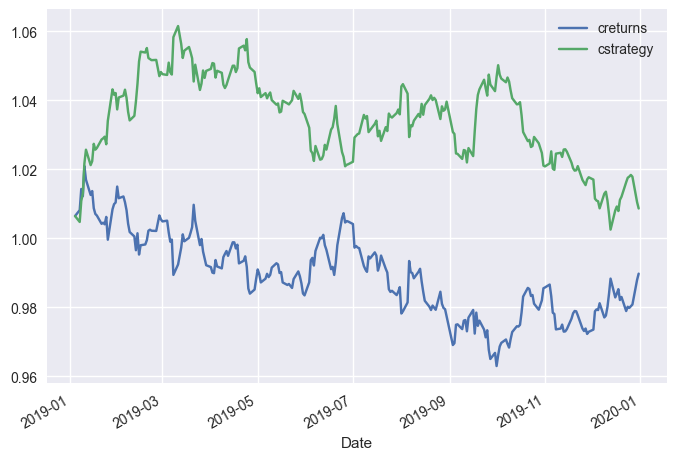

In [150]:
df['strategy'] = df.pred * df.returns
df['creturns'] = df['returns'].cumsum().apply(np.exp)
df['cstrategy'] = df['strategy'].cumsum().apply(np.exp)
df[['creturns', 'cstrategy']].plot()
plt.show()

In [151]:
df['trades'] = df.pred.diff().fillna(0).abs()
df.trades.value_counts()

trades
2.000000    151
0.000000    106
Name: count, dtype: int64

In [152]:
symbol = "EURUSD=X"
start = "2023-06-01"
end = "2024-06-01"
interval = '1d'

In [153]:
testdf = yf.download(symbol, start, end, interval=interval).Close.to_frame()
testdf.rename(columns={"Close": "price"}, inplace=True)
testdf['returns'] = np.log(testdf['price'].div(testdf['price'].shift(1)))
testdf

[*********************100%%**********************]  1 of 1 completed


,price,returns
Date,,
2023-06-01,1.069519,NaN
2023-06-02,1.076079,0.006115
2023-06-05,1.069862,-0.005794
2023-06-06,1.071180,0.001231
2023-06-07,1.069805,-0.001285
...,...,...
2024-05-27,1.084763,0.003227
2024-05-28,1.086189,0.001313
2024-05-29,1.085187,-0.000923


In [154]:
cols = []
for lag in range(1, lags+1):
    col = "lag{}".format(lag)
    testdf[col] = testdf.returns.shift(lag)
    cols.append(col)
testdf.dropna(inplace=True)   
testdf

,price,returns,lag1,lag2
Date,,,,
2023-06-06,1.071180,0.001231,-0.005794,0.006115
2023-06-07,1.069805,-0.001285,0.001231,-0.005794
2023-06-08,1.070744,0.000878,-0.001285,0.001231
2023-06-09,1.078272,0.007006,0.000878,-0.001285
2023-06-12,1.075095,-0.002950,0.007006,0.000878
...,...,...,...,...
2024-05-27,1.084763,0.003227,-0.001158,-0.002764
2024-05-28,1.086189,0.001313,0.003227,-0.001158
2024-05-29,1.085187,-0.000923,0.001313,0.003227


In [155]:
testdf['pred'] = lm.predict(testdf[cols].values)
testdf['pred'] = np.sign(testdf['pred'])


C:\code\trading\v1\pythonProject\.venv\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


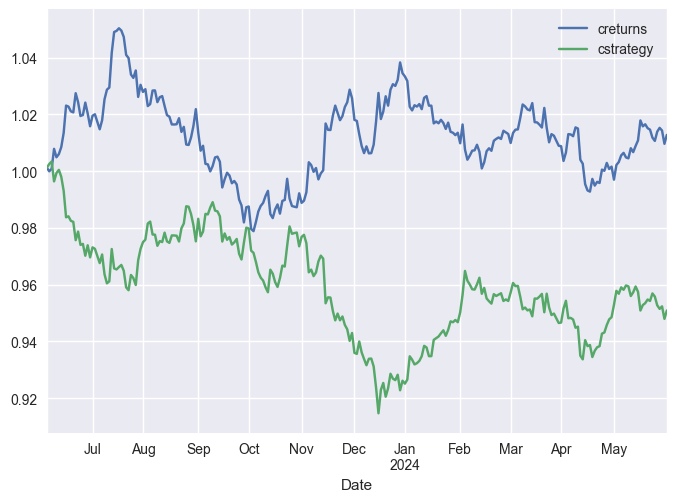

In [156]:
testdf['strategy'] = testdf.pred * testdf.returns
testdf['creturns'] = testdf['returns'].cumsum().apply(np.exp)
testdf['cstrategy'] = testdf['strategy'].cumsum().apply(np.exp)
testdf[['creturns', 'cstrategy']].plot()
plt.show()

In [157]:
testdf.pred.value_counts()

pred
-1.000000    151
1.000000     108
Name: count, dtype: int64

In [158]:
hits = np.sign(testdf.returns*testdf.pred).value_counts()
hit_ratio = hits[1.0] / sum(hits)
hit_ratio

np.float64(0.4864864864864865)